### Introduction

This is an instruction set for running SQUID simulations using a handful of packages writen in python 3. Each package is created around a SQUID model and includes a solver and some utilities to use the solver indirectly to produce more complicated output.

This tutorial will walk through using the **noisy_squid.py** package. Includeded in each SQUID package are:
**basic model** - gives timeseries output of the state of the SQUID
**vj_timeseries()** - gives a plot and csv file of the timeseries state of the SQUID
**iv_curve()** - gives contour plot (discrete values of one parameter) of I-V curve and csv file
**vphi_curve()** - gives countour plot (discrete values of one parameter) of V-PHI curve and csv file
**transfer_fn()** - gives plots of average voltage surface and transfer function surface as well as csv files for each. Returns array of average voltage over the input parameter space in i and phia

Associated with each package:
**dev_package_name.ipynb** - a jupyter notebook used in develping model and utilities
**package_name.ipynb** - a refined jupyter notebook with helpful explanations of how the model and utilities work
**package_name.py** - a python 3 file containing only code, inteded for import into python session of some sort


### Packages

There are four packages, **noisy_single_junction.py**, **quiet_squid.py**, **noisy_squid.py**, and **noisy_squid_2nd_order.py**. The first is somewhat separate and documentation is provided in the jupyter notebook for that file.

Each package requires simulation inputs, namely the time step size tau, the number of steps to simulate **nStep**, an initial state vector **s**. Also required are a set of input parameters **i** and **phia**, and physical parameters **alpha**, **betaL**, **eta**, **rho** at a minimum. The two more detailed solvers require a noise parameter **Gamma**, and perhaps two more parameters **betaC** and **kappa**. These are all supplied as one array of values called par.

The other three are useful to simulate a two-junction SQUID in different circumstances.

**quiet_squid.py** simulates a two-junction SQUID with no thermal noise and no appreciable shot noise. This model is first order and so does not account for capacitive effects. This model assumes no noise, and no capacitance. Use this model if the dynamics of the system without noise are to be investigated.

**noisy_squid.py** is similar to the above, but includes the effects of thermal Johnson noise in the junctions. This model is also first order, assuming negligible effects from capacitance. It is sometimes necessary and or safe to assume negligible effects from capacitance, or zero capacitance. It will be necessary to use the first order model in this case, as setting capacitance to zero in the second order model will result in divide by zero errors.

**noisy_squid_2nd_order.py** is similar to the above, but includes second order effects due to capacitance. This model should be used if capacitance should be considered non-zero.

#### Prerequisites

The only prerequisite is to have python 3 installed on your machine. You may prefer to use some python environment like jupyter notebook or Spyder. The easiest way to get everything is by downloading and installing the latest distribution of **Anaconda**, which will install python 3, juputer notebook, and Spyder as well as providing convenient utilities for adding community provided libraries. Anaconda download link provided:

https://www.anaconda.com/distribution/

Working from the console is easy enough, but working in your prefered development environment will be easier.

### Prepare a file for output

This tutorial will work out of the console, but the same commands will work for a development environment.

Create a file folder in a convenient location on your computer. Place the relevant python file described above in the file. Output files including csv data files and png plots will be stored in this file folder. All file outputs are named like **somethingDatetime.csv** or .png.

### Open a python environment

These packages can be used directly from the console or within your favorite python development environment.

This tutorial will assume the user is working from the console. Open a command prompt. You can do this on Windows by typing "cmd" in the start search bar and launching **Command Prompt**. Change directory to the file folder created in the step above.

***cd "file\tree\folder"***

With the command prompt indicating you are in the folder, type "python" and hit enter. If there are multiple instances (different iterations) of python on your machine, this may need to be accounted for in launching the correct version. See the internet for help on this.

If you have a favorite python environment, be sure to launch in the folder or change the working directory of the development environment to the folder you created. If you do not wish to change the working directory, place the package .py file in the working directory.

### Load the relevant package

With python running, at the command prompt in the console, import the python file containing the model needed.

In this tutorial we will use the first order model including noise, **noisy_squid.py**. Type "import noisy_squid". Execute the command by hitting enter on the console. It may be easier to give the package a nickname, as we will have to type it every time we call a function within it. Do this by instead typing "import noisy_squid as nickname", as below.

In [1]:
import noisy_squid as ns

We need a standard package called **numpy** as well. This library includes some tools we need to create input, namely numpy arrays. Type "import numpy as np" and hit enter.

The code inside the packages aslo relies on other standard packages. Those are loaded from within the package.

In [2]:
import numpy as np

#### Getting Help

You can access the short help description of each model and utility by typing:

***?package_name.utiltiy_name()***

Example:

In [3]:
?ns.transfer_fn()

### noisy_squid.noisySQUID()

The model itself, **noisySQUID()** can be run and gives a timeseries output array for the state of the system.

Included in the output array are **delta_1**, **delta_2**, **j**, **v_1**, **v_2**, and **v** at each simulated moment in time.

To run, first we need to set up some parameters. To see detailed explanations of these, see the developement log in the jupyter notebook associated with the package.

Parameter definitions can be handled in the function call or defined before the function call.

An example of the former: Define values using parameter names, build a parameter array, and finally call the function. Remember, s and par are numpy arrays.

In [7]:
# define values
nStep = 8000
tau = .1
s = np.array([0.,0.])
alpha = 0.
betaL = 1.
eta = 0.
rho = 0.
i = 1.5
phia = .5
Gamma = .05
par = np.array([alpha,betaL,eta,rho,i,phia,Gamma])

Now we can call the simulation. Type 

***noisy_squid.noisySQUID(nStep,tau,s,par)***

to call the function. We may wish to define a new variable to hold the simple array output. We can then show the output by typing the variable again. We do this below by letting **S** be the output. **S** will take on the form of the output, here an array.

In [8]:
S = noisy_squid.noisySQUID(nStep,tau,s,par)

The shortcut method is to call the function only, replacing varibles with values. This example includes a linebreak "\". You can just type it out all in one line if it will fit.

In [12]:
S = noisy_squid.noisySQUID(8000,.1,np.array([0.,0.]),\
                         np.array([0.,1.,0.,0.,1.5,.5,.05]))

We can check the output. Have a look at **S** by typing it.

In [13]:
S

array([[ 0.00000000e+00,  0.00000000e+00,  1.00000000e-01, ...,
         7.99600000e+02,  7.99700000e+02,  7.99800000e+02],
       [ 0.00000000e+00,  2.00515814e-01,  3.97126500e-01, ...,
         3.32133405e+02,  3.32270286e+02,  3.32302717e+02],
       [ 0.00000000e+00,  2.92491487e-02,  5.73332120e-03, ...,
         3.27736399e+02,  3.27784969e+02,  3.27799432e+02],
       ...,
       [ 1.75000000e+00,  1.49630929e+00,  1.23864561e+00, ...,
         1.11819996e+00,  9.95485203e-01,  9.65434479e-01],
       [-2.50000000e-01, -2.24729106e-01, -1.31148972e-01, ...,
         3.02372976e-01,  3.05691324e-01,  3.04423436e-01],
       [ 7.50000000e-01,  6.35790093e-01,  5.53748320e-01, ...,
         7.10286470e-01,  6.50588263e-01,  6.34928958e-01]])

This doesn't mean much. Since the voltage accross the circuit, **v**, is stored in **S** as the 7th row (index 6), we can plot the voltage timeseries. The time **theta** is stored as the first row (index 0). We will need the ploting package **matplotlib.pyplot** to do this.

In [14]:
import matplotlib.pyplot as plt

Text(0,0.5,'ave voltage, $v$')

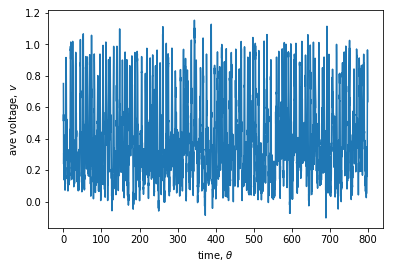

In [19]:
plt.plot(S[0],S[6])
plt.xlabel(r'time, $\theta$')
plt.ylabel(r'ave voltage, $v$')

This model will be useful if you wish to extend the existing utilites here or develop new utilities. To explore the nature of SQUID parameter configurations, it may be easier to start with the other utilities provided.

### noisy_squid.vj_timeseries()

use "**'package_name'.vj_timeseries()**" or "**'package_nickname'.vj_timeseries()**".

This utility does the same as the funciton described above, but gives a plot of the output and creates a csv of the timeseries output array. These are named **timeseries'datetime'.csv** and .png. The plot includes the voltage timeseries and the circulating current time series. The csv file contains metadata describing the parameters.

To run this, define parameters as described above, and call the function. This time,we will change the value of **nStep** to be shorter so we can see some detail in the trace.

This utility does not return anything to store. The only output is the plot and the csv file, so don't bother storing the function call output.

In [50]:
# define values
nStep = 800
tau = .1
s = np.array([0.,0.])
alpha = 0.
betaL = 1.
eta = 0.
rho = 0.
i = 1.5
phia = .5
Gamma = .05
par = np.array([alpha,betaL,eta,rho,i,phia,Gamma])

csv file written out: timeseries20191201023401.csv
png file written out: timeseris20191201023401.png


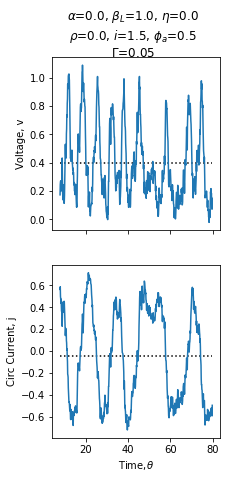

In [27]:
ns.vj_timeseries(nStep,tau,s,par)

### noisy_squid.iv_curve()

This utility is used to create plots and data of the average voltage output of the SQUID vs the applied bias current. We can sweep any of the other parameters and create contours. The utility outputs a data file and plot, **IV'datetime'.csv** and .png.

Define the parameter array as normal. The parameter to sweep will be passed separately as a list of values at which to draw contours. If a value for the parameter to sweep is passed in **par**, it will simply be ignored in favor of the values in the list.

A list is defined by square brackets and values are separated by a comma. This parameter list must be a list and not an array.

The name of the list should be different than parameter name it represents. In this case, I wish to look at three contours corresponding to values of the applied flux **phia**. I name a list **Phi** and give it values.

Place the parameter list in the function call by typing the **parameter_name=List_name**. In this case, **phia=Phi**.

This utility has no console output, so don't bother storing it in a variable.

In [51]:
Phi = [.2,.8,1.6]

Progress: [####################] 100.0%
csv file written out: IV20191201024600.csv
png file written out: IV20191201024600.png


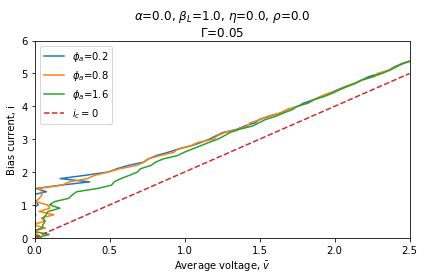

In [33]:
ns.iv_curve(nStep,tau,s,par,phia=Phi)

This curve is very noisy. To get finer detail, increase **nStep** and decrease **tau**.

The underlying numerical method is accurate but slow. Computation time considerations must be considered from here on. I recommend testing a set of parameters with a small number of large steps first, then adjusting for more detail as needed.

From here on, the utilities are looking at average voltage. To get an accurate average voltage you need lots of voltage values, and thus large **nStep**. The error in the underlying Runge-Kutta 4th order method is determined by the size of the time step, smaller = less error. Thus, a more accurate timeseries is provided by a smaller time step **tau**. A more accurate timeseries will result in better convergence of the model to the expected physical output, thus finer detail. 

Computation time will grow directly with the size of **nStep** but will be uneffected by the size of **tau**. If **tau** is larger than one, there will be instability in the method, it will likely not work. There is a minimum size for **tau** as well, to insure stability. Something on the order of 0.1 to 0.01 will usually suffice.

These parameters are your tradeoff control in detail vs computation time.

At any rate, the erratic effect of noise is best dampened by using a larger **nStep**.

Lets try it with 10 times as many time steps.

In [52]:
nStep = 8000
tau = .1

Progress: [####################] 100.0%
csv file written out: IV20191201025539.csv
png file written out: IV20191201025539.png


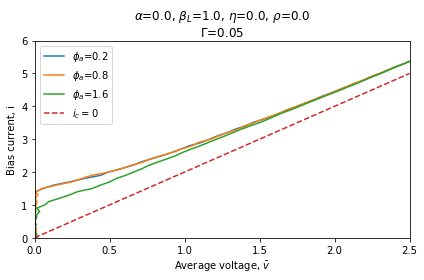

In [37]:
ns.iv_curve(nStep,tau,s,par,phia=Phi)

This looks better. To get a usable plot, it will probably be necessary to set **nStep** on the order of 10^4 to 10^6. Start lower if possible.

Lets try **nStep**=8\*10^5.

In [53]:
nStep = 80000

Progress: [####################] 100.0%
csv file written out: IV20191201040138.csv
png file written out: IV20191201040138.png


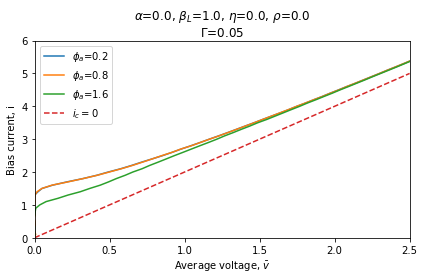

In [54]:
ns.iv_curve(nStep,tau,s,par,phia=Phi)

We can look at a sweep of a different parameter by reseting **phia** to say .2, and creating a list to represent a different parameter. Lets sweep **betaL**.

In [38]:
phia = .2
Beta = [.5,1.,2.]

Progress: [####################] 100.0%
csv file written out: IV20191201030410.csv
png file written out: IV20191201030410.png


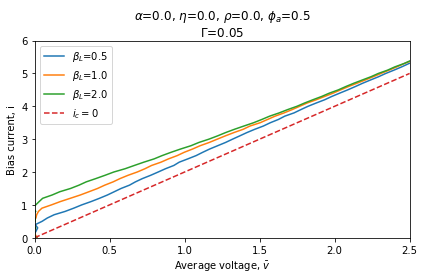

In [39]:
ns.iv_curve(nStep,tau,s,par,betaL=Beta)

### noisy_squid.vphi_curve()

This utility is used to create plots and data of the average voltage output of the SQUID vs the applied magnatic flux. We can sweep any of the other parameters and create contours. The utility outputs a data file and plot, **VPhi'datetime'.csv** and .png.

Define the parameter array as normal. The parameter to sweep will be passed separately as a list of values at which to draw contours. If a value for the parameter to sweep is passed in **par**, it will simply be ignored in favor of the values in the list.

A list is defined by square brackets and values are separated by a comma. This parameter list must be a list and not an array.

The name of the list should be different than parameter name it represents. In this case, I wish to look at three contours corresponding to values of the inductance constant **betaL**. I named a list **Beta** above and gave it values.

Place the parameter list in the function call by typing the **parameter_name=List_name**. In this case, **betaL=Beta**.

This utility has no console output, so don't bother storing it in a variable.

This utility can be computationally expensive. See the notes on this in the **noisy_squid.iv_curve()** section.

Progress: [####################] 100.0%
csv file written out: VPhi20191201030635.csv
png file written out: VPhi20191201030635.png


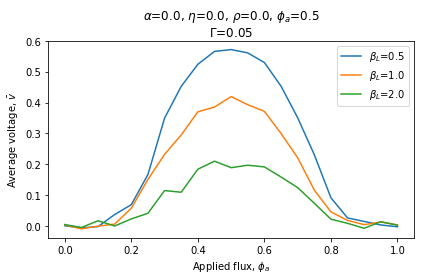

In [40]:
ns.vphi_curve(nStep,tau,s,par,betaL=Beta)

### noisy_squid.transfer_fn()

This utility creates the average voltage surface in bias current / applied flux space. It also calculates the partial derivative of the average voltage surface with respec to applied flux and returns this as the transfer funcion. These are named **AveVsurface'datetime'.png** and .csv, and **TransferFn'datetime'.png** and .csv. This utility also returns an array of average voltage values over the surface which can be stored for further manipulation.

This utility requires us to define an axis for both **i** and **phia**. We do this by making an array for each. We can define the individual elements of the array, but there is an easier way. We can make an array of values evenly spaced across an interval using **np.arange(start, stop+step, step)** as below.

Pass the other parameters as in the instructions under **noisy_squid()**. You may want to start with a smaller value for **nStep**.

In [47]:
nStep = 800
i = np.arange(-3.,3.1,.1)
phia = np.arange(-1.,1.1,.1)

Progress: [####################] 100.0%
csv file written out: AveVsurface20191201032043.csv
png file written out: AveVsurface20191201032043.png
csv file written out: TransferFn20191201032043.csv


C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: The required storage space exceeds the available storage space.
Probable causes: nxest or nyest too small or s is too small. (fp>s)
	kx,ky=3,3 nx,ny=28,28 m=1281 fp=0.708812 s=0.050000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


png file written out: TransferFn20191201032043.png


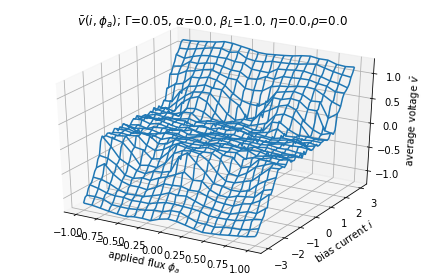

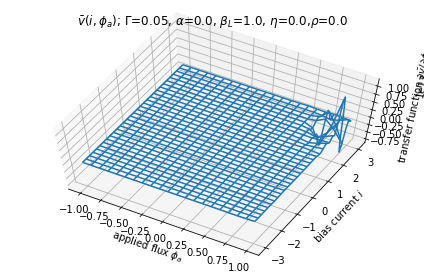

In [46]:
vsurf = ns.transfer_fn(nStep,tau,s,par,i,phia)

The average voltage surface looks ok, but not great. Noisy spots in the surface will negatively effect the transfer function determination. The transfer function surface has large derivatives in the corner which over saturate the plot hiding detail in most of the surface. To fix this, we need a truer average voltage surface. We need more time steps. If you have some time, try **nStep**=8000.

Note that it may be possible to clean the data from the csv file and recover some detail in plotting. Be careful...

In [48]:
nStep = 8000

Progress: [####################] 100.0%


C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: The required storage space exceeds the available storage space.
Probable causes: nxest or nyest too small or s is too small. (fp>s)
	kx,ky=3,3 nx,ny=28,28 m=1281 fp=7463111837321112.000000 s=0.050000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


csv file written out: AveVsurface20191201033603.csv
png file written out: AveVsurface20191201033603.png
csv file written out: TransferFn20191201033603.csv
png file written out: TransferFn20191201033603.png


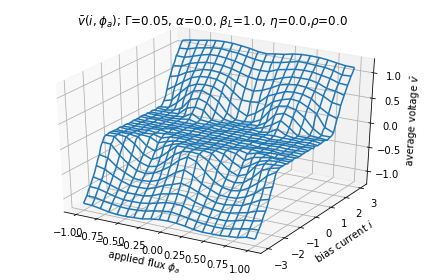

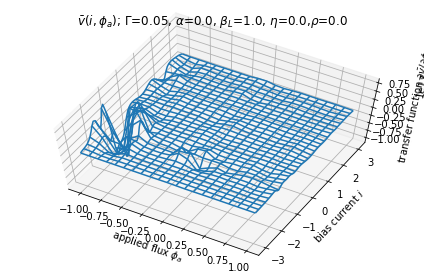

In [49]:
vsurf = ns.transfer_fn(nStep,tau,s,par,i,phia)